In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
# Constants
Q = 10    # source emission rate (kg/s)
U = 3     # wind speed (m/s)
H = 0
min_concentration = 9*10**(-7)
x0, y0, z0 = 500, 0, 0

# Grid
rmax = 4000  # size of domain in r (m)
ymax = 2000  # size of domain in y (m)
N = 2000     # number of plotting points

In [ ]:
# Определение устойчивости атмосферы
def classify_atmospheric_stability(U: int):
    ''''''
    if U < 2:
        return "B"
    elif U < 5:
        return "C"
    else:
        return "D"

In [ ]:
def calculate_plume_dispersion(x, atmospheric_stability):
    ''''''
    match atmospheric_stability:
        case "B":
            return (0.16*x*((1 + 0.0001*x)**(-1/2)), 0.12*x)
        case "C":
            return (0.11*x*((1 + 0.0001*x)**(-1/2)) ,0.08*x*((1 + 0.0002*x)**(-1/2)))
        case "D":
            return (0.08*x*((1 + 0.0001*x)**(-1/2)) ,0.06*x*((1 + 0.0015*x)**(-1/2)))
    


In [ ]:
def gauss_func(x, y, z, atmospheric_stability):
    
    dy, dz = calculate_plume_dispersion(x, atmospheric_stability)

    a = Q/(2*np.pi*U*dy*dz)
    b = np.exp((-(y-y0)**2)/(2*dy**2))
    c = np.exp((-(z-H)**2)/(2*dz**2))
    d = np.exp((-(z+H)**2)/(2*dz**2))
    return a*b*(c+d)

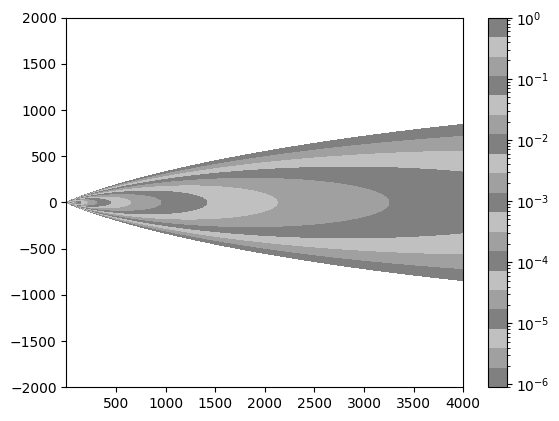

1.6415835612801324e-10
0.0


In [ ]:
lev = list(np.geomspace(min_concentration, 1, 20))
atmospheric_stability = classify_atmospheric_stability(U)

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])


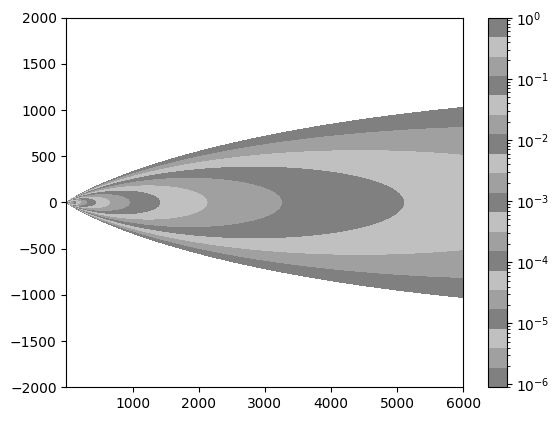

4.977875172833958e-08
0.0


In [ ]:
rmax = 6000
lev = list(np.geomspace(min_concentration, 1, 20))

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])
